In [28]:
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import font_manager,rc

plt.rc("font", family = "Malgun gothic")

In [29]:
credentials = service_account.Credentials.from_service_account_file("./teamproject_key.json")

In [30]:
client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [31]:
dui = """
SELECT
  FORMAT_DATE('%Y', `teamproject-428905.kim.population_city`.`연도`) AS date,
  (`teamproject-428905.kim.dui_city`.`서울` / `teamproject-428905.kim.population_city`.`서울특별시`) * 100 AS seoul,
  (`teamproject-428905.kim.dui_city`.`부산` / `teamproject-428905.kim.population_city`.`부산광역시`) * 100 AS busan,
  (`teamproject-428905.kim.dui_city`.`대구` / `teamproject-428905.kim.population_city`.`대구광역시`) * 100 AS daegu,
  (`teamproject-428905.kim.dui_city`.`인천` / `teamproject-428905.kim.population_city`.`인천광역시`) * 100 AS incheon,
  (`teamproject-428905.kim.dui_city`.`광주` / `teamproject-428905.kim.population_city`.`광주광역시`) * 100 AS gwangju,
  (`teamproject-428905.kim.dui_city`.`대전` / `teamproject-428905.kim.population_city`.`대전광역시`) * 100 AS daejeon,
  (`teamproject-428905.kim.dui_city`.`울산` / `teamproject-428905.kim.population_city`.`울산광역시`) * 100 AS ulsan,
  (`teamproject-428905.kim.dui_city`.`세종` / `teamproject-428905.kim.population_city`.`세종특별자치시`) * 100 AS sejong,
  (`teamproject-428905.kim.dui_city`.`경기` / `teamproject-428905.kim.population_city`.`경기도`) * 100 AS gyeonggi,
  (`teamproject-428905.kim.dui_city`.`강원` / `teamproject-428905.kim.population_city`.`강원특별자치도`) * 100 AS kangwon,
  (`teamproject-428905.kim.dui_city`.`충북` / `teamproject-428905.kim.population_city`.`충청북도`) * 100 AS chungbuk,
  (`teamproject-428905.kim.dui_city`.`충남` / `teamproject-428905.kim.population_city`.`충청남도`) * 100 AS chungnam,
  (`teamproject-428905.kim.dui_city`.`전북` / `teamproject-428905.kim.population_city`.`전북특별자치도`) * 100 AS jeonbuk,
  (`teamproject-428905.kim.dui_city`.`전남` / `teamproject-428905.kim.population_city`.`전라남도`) * 100 AS jeonnam,
  (`teamproject-428905.kim.dui_city`.`경북` / `teamproject-428905.kim.population_city`.`경상북도`) * 100 AS gyeongbuk,
  (`teamproject-428905.kim.dui_city`.`경남` / `teamproject-428905.kim.population_city`.`경상남도`) * 100 AS gyeongnam,
  (`teamproject-428905.kim.dui_city`.`제주` / `teamproject-428905.kim.population_city`.`제주특별자치도`) * 100 AS jeju
FROM
  `teamproject-428905.kim.population_city`
JOIN
  `teamproject-428905.kim.dui_city`
ON
  FORMAT_DATE('%Y', `teamproject-428905.kim.dui_city`.`연도`) = FORMAT_DATE('%Y', `teamproject-428905.kim.population_city`.`연도`)
WHERE
  FORMAT_DATE('%Y', `teamproject-428905.kim.dui_city`.`연도`) >= '2012';
"""

In [5]:
dui_df = client.query(dui).to_dataframe()

C:\Users\rlawn\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
dui_df = dui_df.set_index("date")

In [20]:
dui_df

,seoul,busan,daegu,incheon,gwangju,daejeon,ulsan,sejong,gyeonggi,kangwon,chungbuk,chungnam,jeonbuk,jeonnam,gyeongbuk,gyeongnam,jeju
date,,,,,,,,,,,,,,,,,
2012,0.037458,0.034648,0.055674,0.052708,0.082153,0.061000,0.078448,0.000000,0.059372,0.080201,0.078754,0.090301,0.063683,0.070381,0.076009,0.047962,0.078463
2013,0.034997,0.033053,0.051207,0.046219,0.071831,0.060738,0.075315,0.063854,0.053479,0.069119,0.073884,0.074672,0.053551,0.069475,0.063346,0.047063,0.070057
2014,0.033267,0.028300,0.048892,0.040653,0.061861,0.046677,0.074933,0.051882,0.046651,0.058856,0.065551,0.068420,0.047126,0.060658,0.061612,0.042713,0.068330
2015,0.034454,0.029142,0.045582,0.040502,0.059367,0.048460,0.068767,0.046471,0.048169,0.061891,0.068247,0.070320,0.049205,0.061603,0.059049,0.041519,0.074632
2016,0.028941,0.022552,0.037753,0.035643,0.052001,0.043913,0.051437,0.038264,0.039011,0.045654,0.053467,0.057375,0.040380,0.047481,0.046956,0.029076,0.056889
2017,0.029054,0.020428,0.035956,0.033915,0.047002,0.037012,0.044888,0.031774,0.038994,0.050124,0.056635,0.064674,0.041626,0.047721,0.044841,0.027393,0.048548
2018,0.029245,0.021590,0.036153,0.031747,0.046254,0.039867,0.049064,0.031198,0.038923,0.044004,0.055151,0.061516,0.037184,0.048222,0.044456,0.028394,0.048262
2019,0.022510,0.018630,0.028794,0.026040,0.037694,0.032003,0.032491,0.026132,0.031270,0.031917,0.042375,0.047982,0.031832,0.042435,0.039762,0.025873,0.044114
2020,0.024068,0.021875,0.031633,0.029869,0.041998,0.035454,0.038116,0.020234,0.033477,0.040121,0.045851,0.052239,0.034200,0.047042,0.040615,0.030627,0.053659


# 2012년

<Axes: >

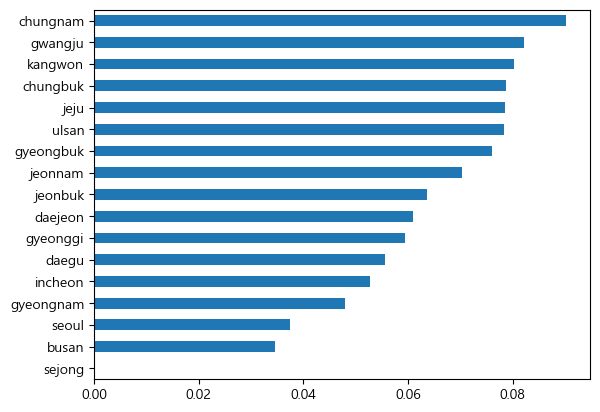

In [32]:
df_one = dui_df.loc["2012"].sort_values()
df_one.plot(kind = "barh")

# 2013년

<Axes: >

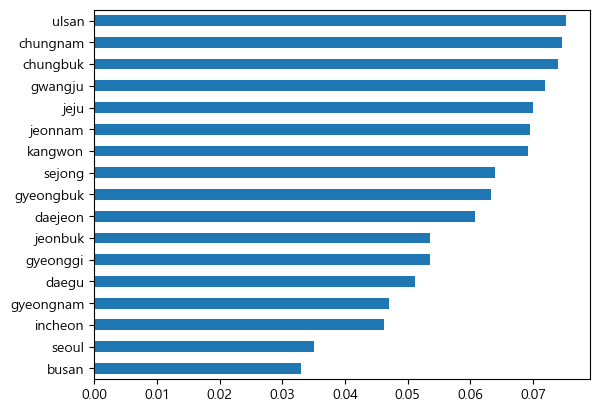

In [33]:
df_two = dui_df.loc["2013"].sort_values()
df_two.plot(kind = "barh")

# 2014년

<Axes: >

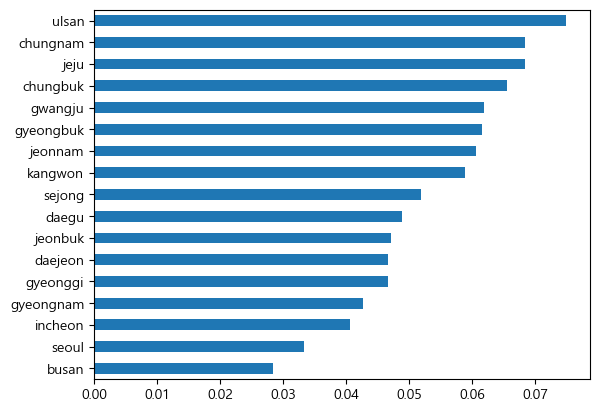

In [35]:
df_three = dui_df.loc["2014"].sort_values()
df_three.plot(kind = "barh")

# 2015년

<Axes: >

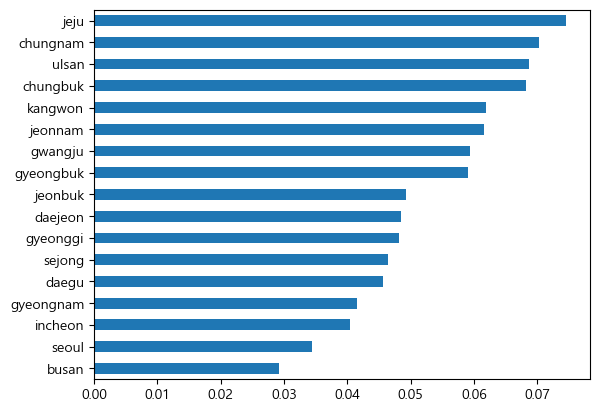

In [36]:
df_four = dui_df.loc["2015"].sort_values()
df_four.plot(kind = "barh")

# 2016년

<Axes: >

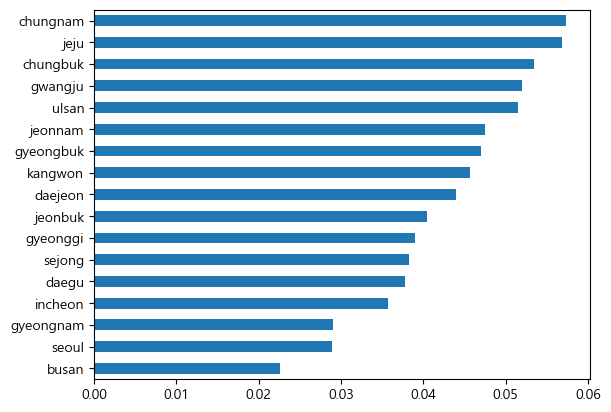

In [37]:
df_five = dui_df.loc["2016"].sort_values()
df_five.plot(kind = "barh")

# 2017년

<Axes: >

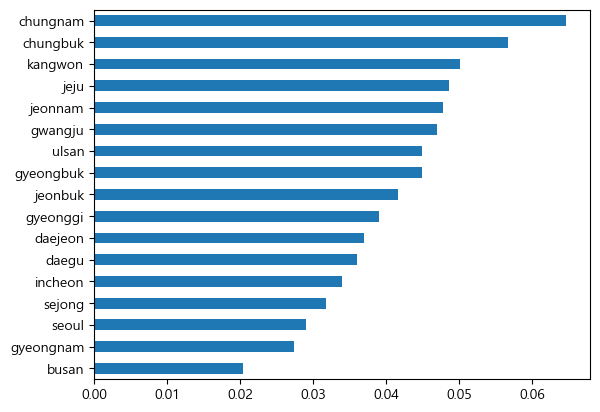

In [38]:
df_six = dui_df.loc["2017"].sort_values()
df_six.plot(kind = "barh")

# 2018년

<Axes: >

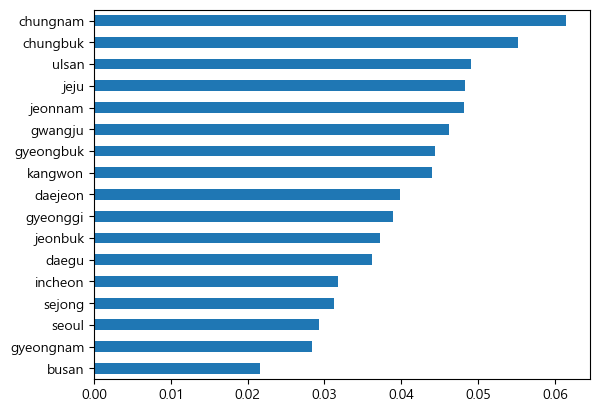

In [39]:
df_seven = dui_df.loc["2018"].sort_values()
df_seven.plot(kind = "barh")

# 2019년

<Axes: >

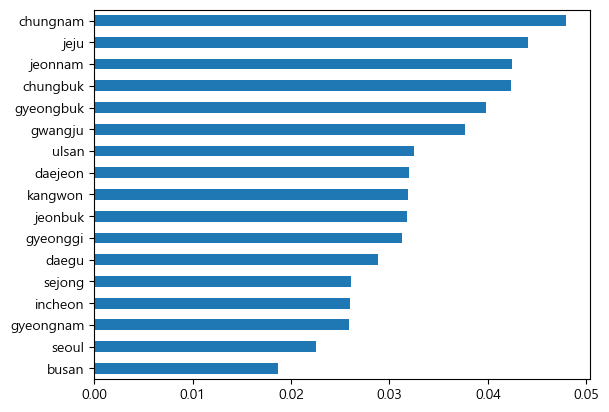

In [40]:
df_eight = dui_df.loc["2019"].sort_values()
df_eight.plot(kind = "barh")

# 2020년

<Axes: >

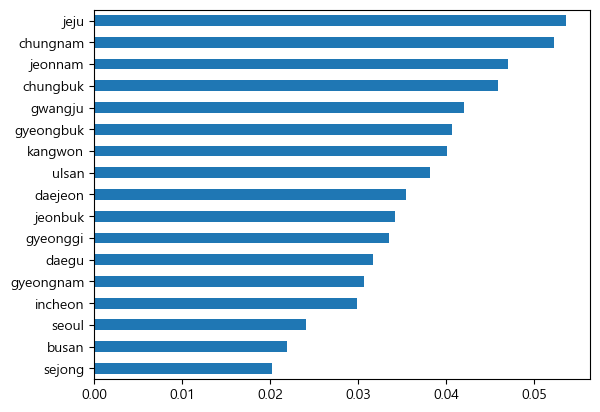

In [41]:
df_nine = dui_df.loc["2020"].sort_values()
df_nine.plot(kind = "barh")

# 2021년

<Axes: >

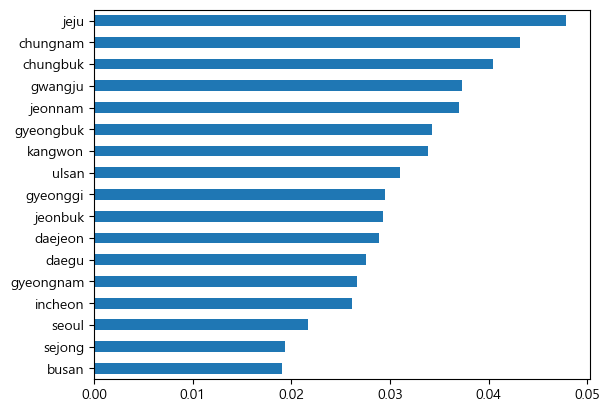

In [42]:
df_ten = dui_df.loc["2021"].sort_values()
df_ten.plot(kind = "barh")